In [1]:
RESULTS_PATH = '../results/1.3/01'

In [2]:
import pandas as pd

def parse_file(file_path):
    return pd.read_csv(
        file_path,
        sep='\\s+',
        skiprows=3,  # Skip the first 3 lines of metadata
        names=[
            "Benchmark", "DatabaseType", "Library", "Rows", "Mode", "Cnt", 
            "Score", "", "Error", "Units"
        ]
    )

df_avgt = parse_file(RESULTS_PATH + '/run-avgt.txt')
print(df_avgt.head())
df_ss = parse_file(RESULTS_PATH + '/run-ss.txt')
df_ss.head()


                 Benchmark DatabaseType            Library  Rows  Mode  Cnt  \
0  KapperBenchmark.find100       SQLITE               JDBC  1000  avgt   15   
1  KapperBenchmark.find100       SQLITE             KAPPER  1000  avgt   15   
2  KapperBenchmark.find100       SQLITE  KAPPER-NO-AUTOMAP  1000  avgt   15   
3  KapperBenchmark.find100       SQLITE          HIBERNATE  1000  avgt   15   
4  KapperBenchmark.find100       SQLITE              KTORM  1000  avgt   15   

     Score      Error  Units  
0   71.639  ±   0.233  us/op  
1  205.808  ±   2.590  us/op  
2   79.428  ±   0.783  us/op  
3  125.325  ±   0.984  us/op  
4  583.965  ±  82.389  us/op  


,Benchmark,DatabaseType,Library,Rows,Mode,Cnt,Score,,Error,Units
0,KapperBenchmark.find100,SQLITE,JDBC,1000,ss,3,2397.542,±,2924.927,us/op
1,KapperBenchmark.find100,SQLITE,KAPPER,1000,ss,3,106229.667,±,18705.120,us/op
2,KapperBenchmark.find100,SQLITE,KAPPER-NO-AUTOMAP,1000,ss,3,19488.694,±,8946.259,us/op
3,KapperBenchmark.find100,SQLITE,HIBERNATE,1000,ss,3,485747.889,±,127151.437,us/op
4,KapperBenchmark.find100,SQLITE,KTORM,1000,ss,3,143203.194,±,21249.367,us/op


In [4]:

benchmark_results = {}
filters = ['find100', 'findById', 'insertSingleRow', 'simpleJoin', 'updateSingleRow']

for filter_name in filters:
    benchmark_results[filter_name] = df_avgt[
        (df_avgt['Benchmark'] == f'KapperBenchmark.{filter_name}') & 
        (df_avgt['DatabaseType'] == 'POSTGRESQL')
    ]

benchmark_results

{'find100':                  Benchmark DatabaseType            Library  Rows  Mode  Cnt  \
 5  KapperBenchmark.find100   POSTGRESQL               JDBC  1000  avgt   15   
 6  KapperBenchmark.find100   POSTGRESQL             KAPPER  1000  avgt   15   
 7  KapperBenchmark.find100   POSTGRESQL  KAPPER-NO-AUTOMAP  1000  avgt   15   
 8  KapperBenchmark.find100   POSTGRESQL          HIBERNATE  1000  avgt   15   
 9  KapperBenchmark.find100   POSTGRESQL              KTORM  1000  avgt   15   
 
      Score       Error  Units  
 5   85.867  ±    0.994  us/op  
 6  330.150  ±  155.284  us/op  
 7   86.755  ±    0.295  us/op  
 8  123.994  ±    0.964  us/op  
 9  907.302  ±  139.134  us/op  ,
 'findById':                    Benchmark DatabaseType            Library  Rows  Mode  Cnt  \
 15  KapperBenchmark.findById   POSTGRESQL               JDBC  1000  avgt   15   
 16  KapperBenchmark.findById   POSTGRESQL             KAPPER  1000  avgt   15   
 17  KapperBenchmark.findById   POSTGRESQL  KAPPER

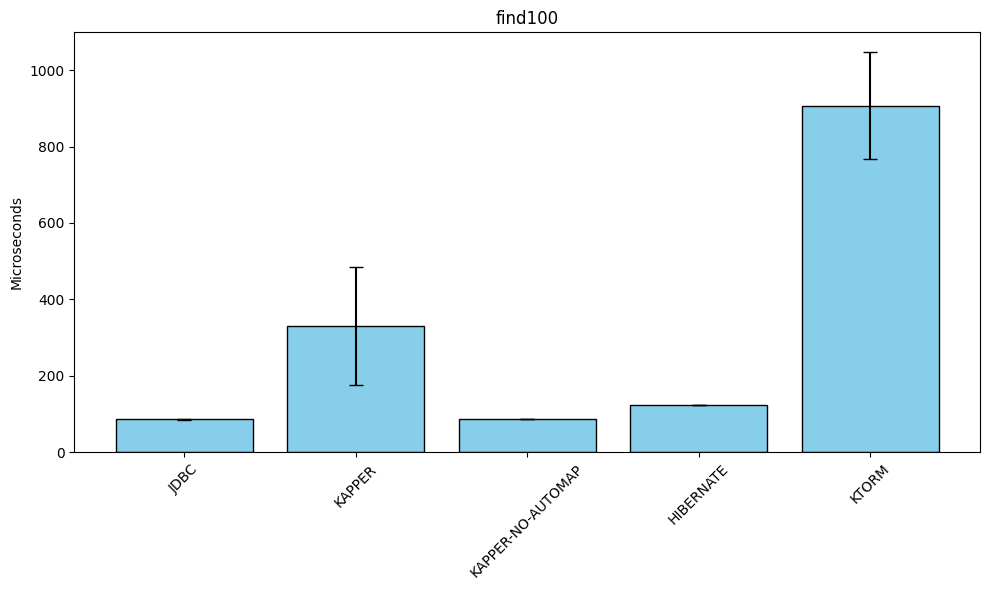

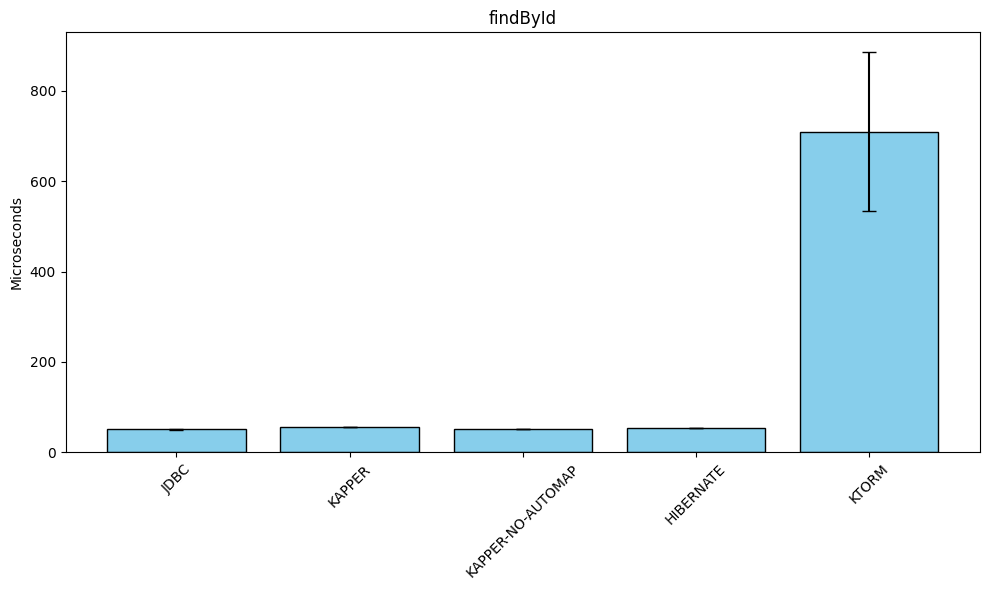

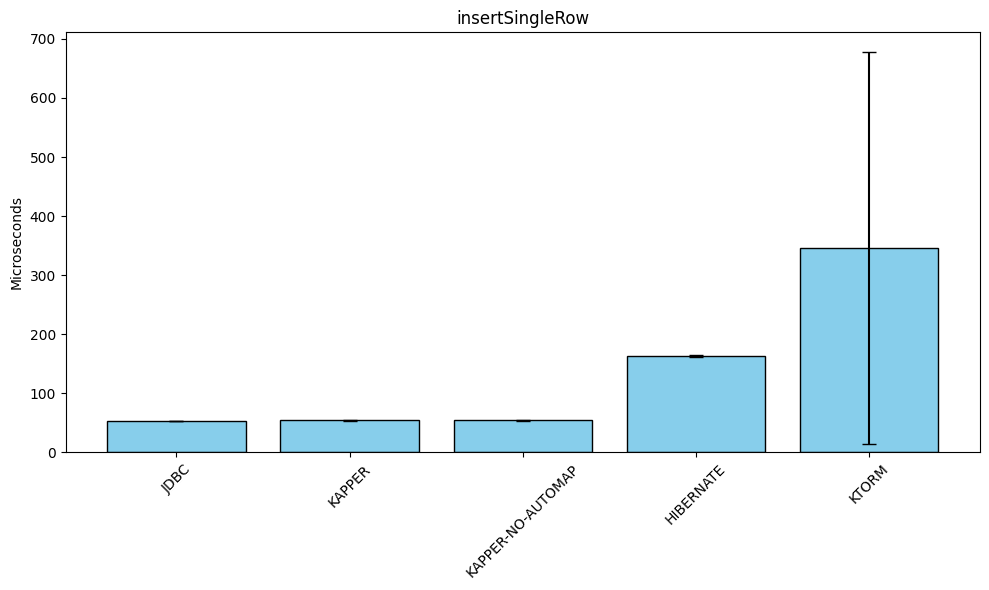

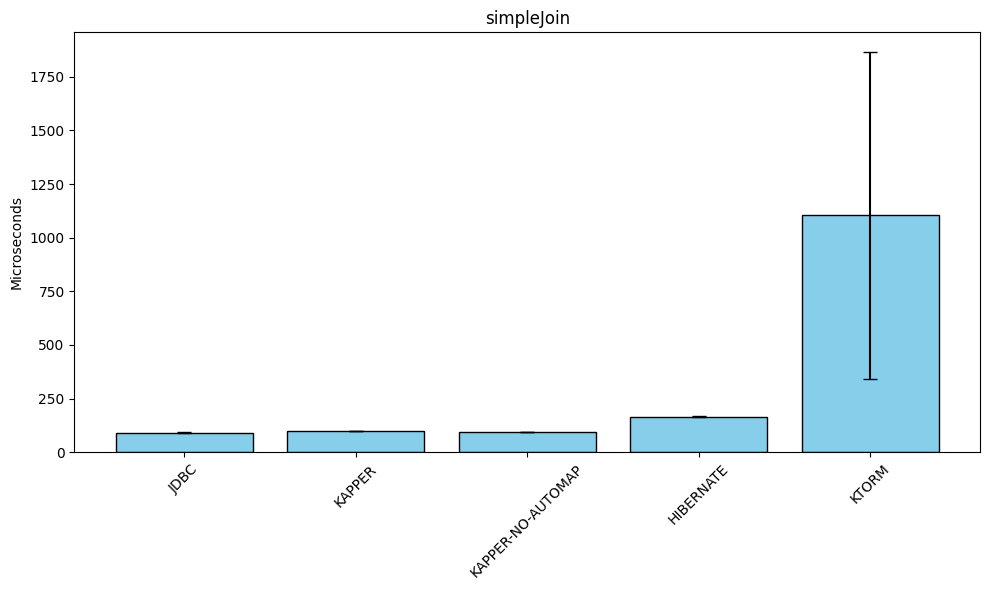

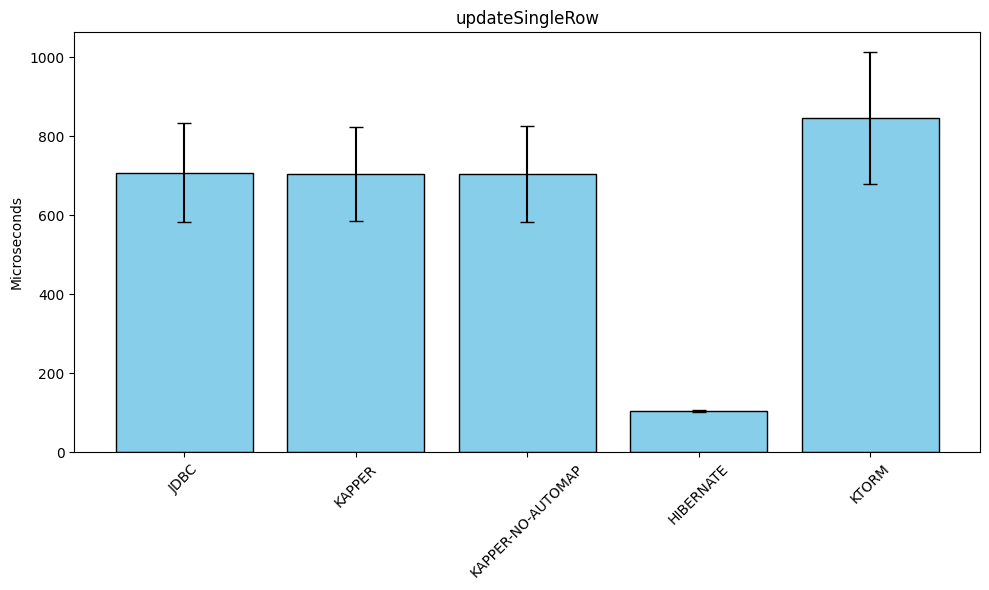

In [10]:
import os
import matplotlib.pyplot as plt

os.makedirs(f'{RESULTS_PATH}/graphs/', exist_ok=True)

for key, df in benchmark_results.items():
    # Extract data
    libraries = df['Library']
    scores = df['Score']
    errors = df['Error']

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(libraries, scores, yerr=errors, capsize=5, color='skyblue', edgecolor='black')

    # Add labels and title
    plt.ylabel('Microseconds')
    plt.title(f'{key}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot

    plt.savefig(f'{RESULTS_PATH}/graphs/{key.lower()}.png')
    plt.show()